In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("student-mat.csv") #Read CSV file

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

For this analysis, we are going to combine weekday and weekend alcohol consumption into one attribute (1-5):

In [5]:
#Combine Workday(Dalc) and Weekend(Walc) Alcohol Consumption into Alcohol
df["Alc"] = (df["Walc"] + df["Dalc"]).div(2).round().astype(int)
#Drop Dalc and Walc since we do not need them anymore
df.drop('Dalc', axis=1, inplace=True)
df.drop('Walc', axis=1, inplace=True)

Let's see if any attributes are correlated:

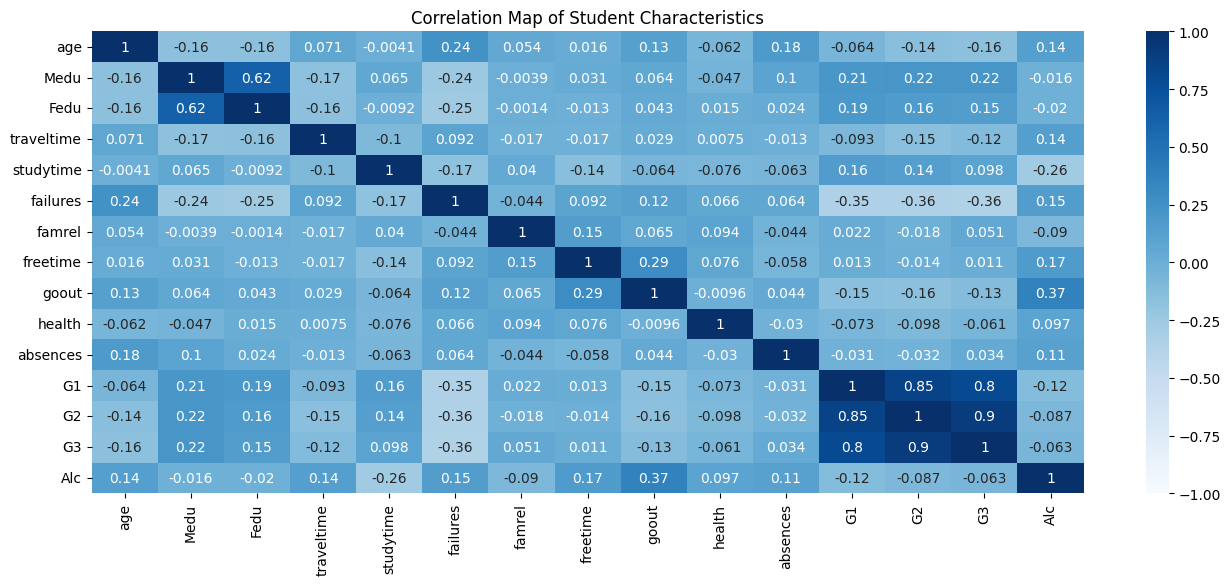

In [6]:
#Increase the size of the figure
plt.figure(figsize = (16,6))
#Plot the heat map with seaborn. Pearson method is used, includes only numeric data, goes from -1 to 1 in correlation, and notes the values
dataplot = sns.heatmap(df.corr(method='pearson',numeric_only = True),cmap = "Blues", vmin = -1, vmax = 1, annot=True)
#Setting the tile of the chart
dataplot.set_title("Correlation Map of Student Characteristics")
#Shows the result
plt.show()

# Data Distribution

The map shows that no attributes are highly correlated besides G1, G2, and G3 (student's grades) which makes sense.

Let's take a look at how our actual data is distributed:

In [7]:
#Method to create a pie chart
def draw_percentage_pie_chart(df, attribute):

  # Get the value counts for the attribute
  value_counts = df[attribute].value_counts().sort_values(ascending=False)
  
  # Calculate percentages
  total = len(df)
  percentages = (value_counts / total) * 100
  
  # Combine labels with counts and format as strings
  labels = [f"{label} ({int(count)}) - {pct:.1f}%" for label, count, pct in zip(value_counts.index, value_counts, percentages)]
  
  # Create the pie chart
  plt.pie(percentages, labels=labels, autopct="")  # Disable default autopct
  plt.title(f'Percentage Distribution by {attribute}') #Title of graph
  plt.show() #Display pie chart

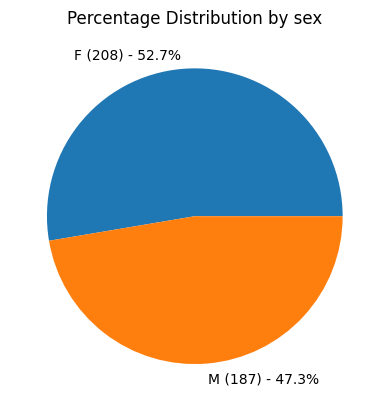

In [8]:
draw_percentage_pie_chart(df, 'sex')

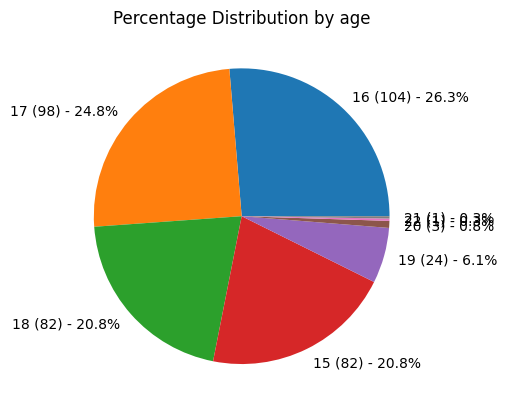

In [9]:
draw_percentage_pie_chart(df, 'age')

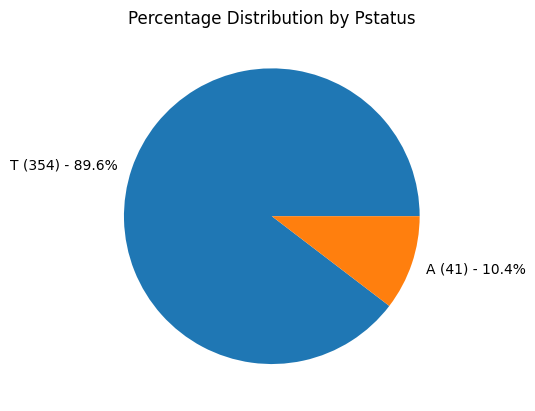

In [10]:
draw_percentage_pie_chart(df, 'Pstatus')

In this instance, T means parents live together and A means parents live apart

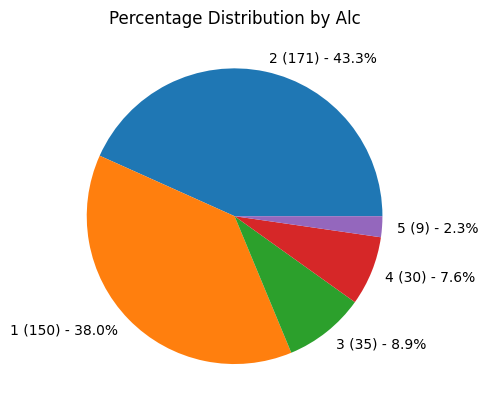

In [11]:
draw_percentage_pie_chart(df, 'Alc')

The higher the number for Alc, the more alcohol a student in that category consumes, from Very Low to Very High

# Alcohol Consumption Percentage Distributions

Let's see percentage distributions of alcohol consumption within each attribute:

In [12]:
#Creates a stacked bar graph to show alcohol consumption, compared via attributes
def percentages_consumption_by_attribute(df, attribute):
    #Group Alc with the attributes
    alc_counts = df.groupby([attribute, 'Alc']).size()
    consumption_totals = df.groupby([attribute]).size()
    
    #For creating the stacks
    percentages_dalc = alc_counts / consumption_totals * 100

    # Plot consumption (one graph)
    percentages_dalc.unstack().plot(kind="bar", stacked=True) #Create stacked bar graph
    plt.xlabel(attribute) #Label the x-axis with attributes
    plt.ylabel('Percentage of students') #Label the y axis with the percentage of students
    plt.yticks(range(0, 101, 10)) #Set the tick labels for the y-axis
    plt.title(f'Student Consumption By: {attribute}') #Set title of graph
    plt.legend(('Very Low', 'Low', 'Medium', 'High', 'Very High'), title = "Alcohol Consumption", loc='lower right') #Set legend of the graph
    
    plt.tight_layout() #Adjust padding of the graph
    plt.show() #Display results

Running it with some examples:

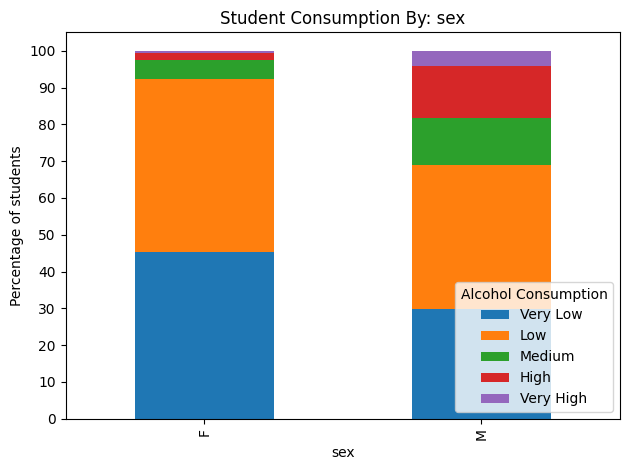

In [13]:
percentages_consumption_by_attribute(df, 'sex')

It seems clear that males have higher consumption of females based on this graph difference, with men having higher representation in the upper categories than women.

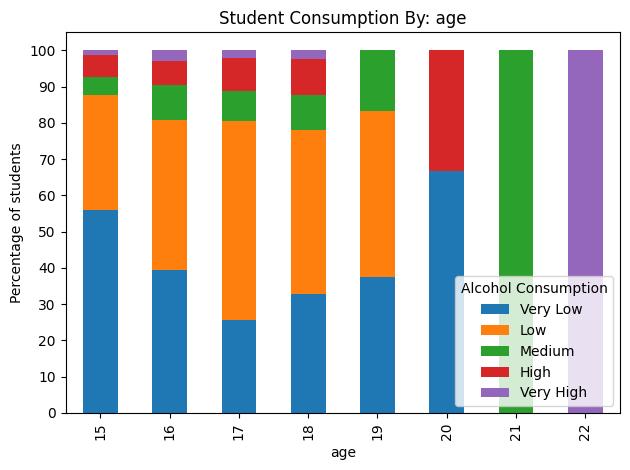

In [14]:
percentages_consumption_by_attribute(df, 'age')

Why does 21 and 22 only have a single attribute? The age pie chart showed how little samples there were. Since it's not nearly enough sample count it's highly inaccurate and we will have to ignore it for analysis purposes.

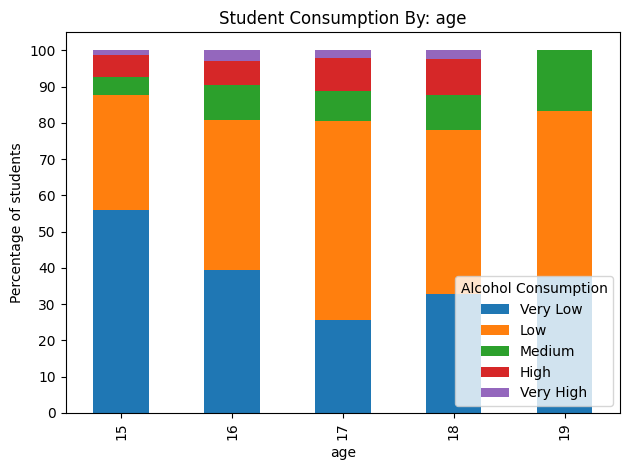

In [15]:
df.drop(df[df['age'] >= 20].index, inplace=True)
percentages_consumption_by_attribute(df, 'age')

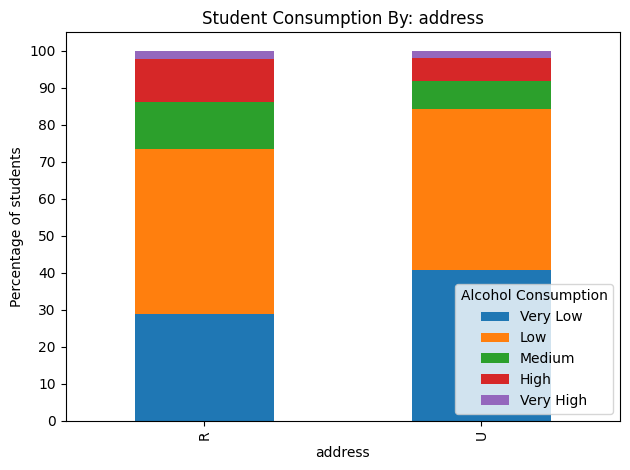

In [16]:
percentages_consumption_by_attribute(df, 'address')

In this case, R means Rural and U means Urban

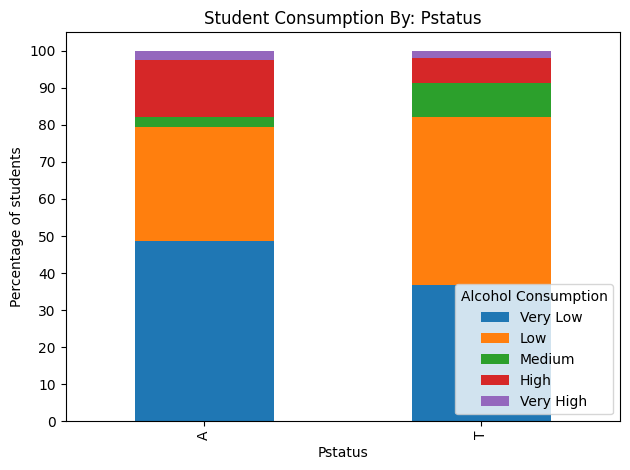

In [17]:
percentages_consumption_by_attribute(df, 'Pstatus')

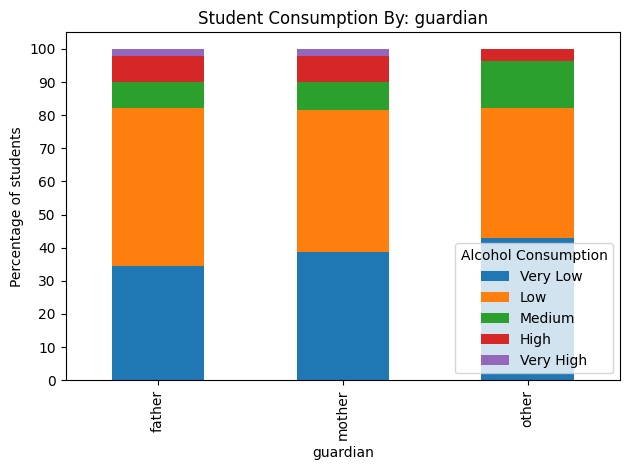

In [18]:
percentages_consumption_by_attribute(df, 'guardian')

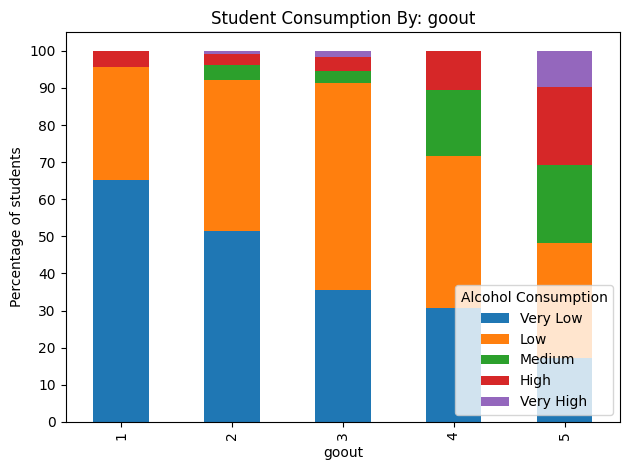

In [19]:
percentages_consumption_by_attribute(df, 'goout')

# Grades and Alcohol Consumption

Let's see how alcohol consumption correlates to grade scores:

In [20]:
#Function to draw a histogram graph
def draw_consumption_histograms(df, attribute, xlabel):
    #Create a low consumption and high consumption data frame
    low_consumption_df = df[df['Alc'] <= 1]
    high_consumption_df = df[df['Alc'] >= 4]

    #Adjust figure size and have two separate graphs
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    norm1 = pd.Series(low_consumption_df)
    norm2 = pd.Series(high_consumption_df)

    sns.histplot(low_consumption_df[attribute], ax=axes[0]) 
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Low Alcohol Consumption')

    sns.histplot(high_consumption_df[attribute], ax=axes[1])
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('High Alcohol Consumption')
    sns.kdeplot(norm1)
    sns.kdeplot(norm2)
    plt.tight_layout()
    plt.show()

In [21]:
#We want to find out the average grades by category of alcohol consumption
avg_grades = df.groupby('Alc')['G2'].mean()
print('Average grades by alcohol consumption:')
print(avg_grades)

Average grades by alcohol consumption:
Alc
1    11.020270
2    10.754386
3     9.235294
4    10.413793
5    11.125000
Name: G2, dtype: float64


Seems like alcohol doesn't affect grades, but lets look at a histogram plots too:

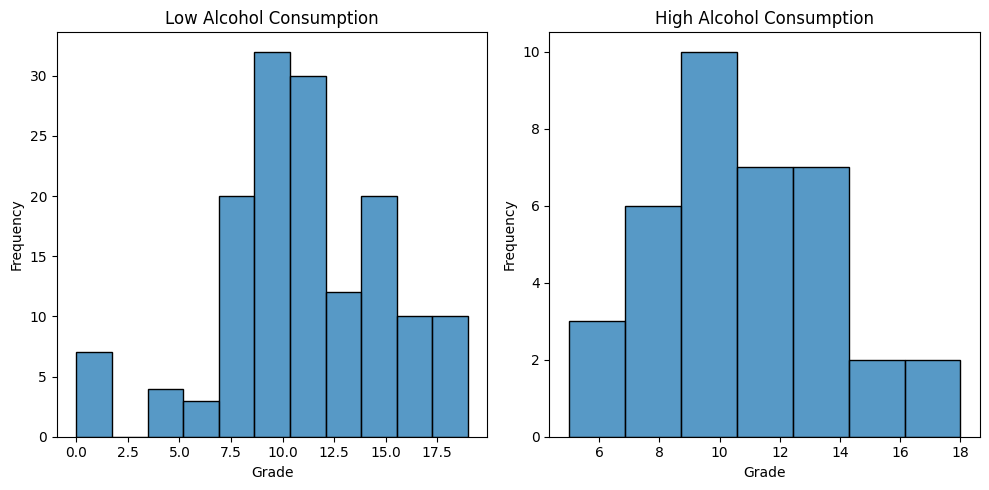

In [22]:
low_consumption_df = df[df['Alc'] <= 1]
high_consumption_df = df[df['Alc'] >= 4]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


sns.histplot(low_consumption_df['G2'], ax=axes[0]) 
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Low Alcohol Consumption')

sns.histplot(high_consumption_df['G2'], ax=axes[1])
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_title('High Alcohol Consumption')

#low_consumption_df, hist=True)

plt.tight_layout()
plt.show()

Average absence count by alcohol consumption:
Alc
1    4.925676
2    5.690058
3    7.176471
4    7.344828
5    7.750000
Name: absences, dtype: float64


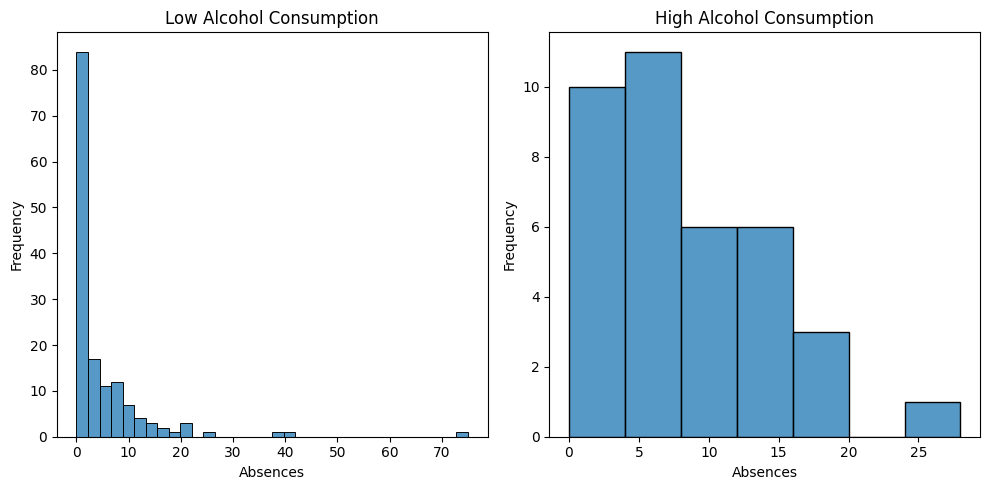

Median absence count by alcohol consumption:
Alc
1    2.0
2    4.0
3    4.0
4    6.0
5    7.0
Name: absences, dtype: float64


In [23]:
avg_grades = df.groupby('Alc')['absences'].mean()
print('Average absence count by alcohol consumption:')
print(avg_grades)

low_consumption_df = df[df['Alc'] <= 1]
high_consumption_df = df[df['Alc'] >= 4]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create a histogram for low consumption with absences
sns.histplot(low_consumption_df['absences'], ax=axes[0]) 
axes[0].set_xlabel('Absences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Low Alcohol Consumption')

#Create a histogram for high consumption with absences
sns.histplot(high_consumption_df['absences'], ax=axes[1])
axes[1].set_xlabel('Absences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('High Alcohol Consumption')

plt.tight_layout()
plt.show()

avg_grades = df.groupby('Alc')['absences'].median()
print('Median absence count by alcohol consumption:')
print(avg_grades)

In [24]:
mldf = pd.read_csv("student-mat.csv")

dropped_columns = ["address", "famsize", "reason", "traveltime"
                   ,"reason", "paid", "activities", "nursery",
                    "internet", "romantic", "health", "school", "G1", "G2", "G3" ]
mldf.drop(dropped_columns, inplace = True, axis = 1)

#sex, age, pstatus, medu, fedu, mjob, fjob, guardian, studytime, failures, schoolsup
#famsup, higher, famrel, freetime, goout, dalc, walc, absences
print(mldf)

    sex  age Pstatus  Medu  Fedu      Mjob      Fjob guardian  studytime  \
0     F   18       A     4     4   at_home   teacher   mother          2   
1     F   17       T     1     1   at_home     other   father          2   
2     F   15       T     1     1   at_home     other   mother          2   
3     F   15       T     4     2    health  services   mother          3   
4     F   16       T     3     3     other     other   father          2   
..   ..  ...     ...   ...   ...       ...       ...      ...        ...   
390   M   20       A     2     2  services  services    other          2   
391   M   17       T     3     1  services  services   mother          1   
392   M   21       T     1     1     other     other    other          1   
393   M   18       T     3     2  services     other   mother          1   
394   M   19       T     1     1     other   at_home   father          1   

     failures schoolsup famsup higher  famrel  freetime  goout  Dalc  Walc  \
0        

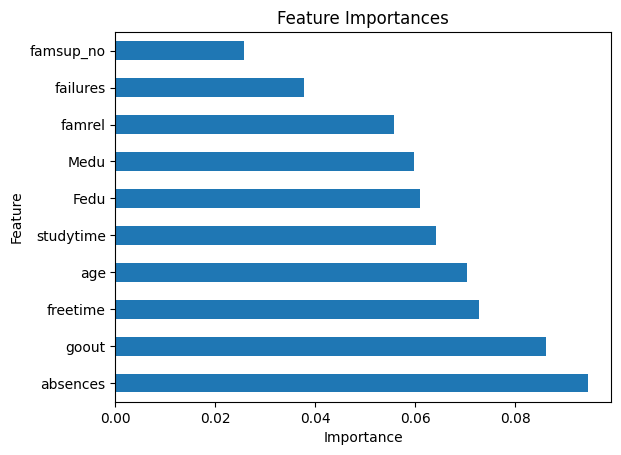

In [25]:
#Converts data into indicator variables to use in the decision trees in the Random Forests
mldf = pd.get_dummies(mldf)
#Combine Dalc and Walc like earlier
mldf["Alc"] = (mldf["Walc"] + mldf["Dalc"]).div(2).round().astype(int)
#Combine columns to drop
alcDrop = ['Dalc', 'Walc']
#Drop columns
mldf.drop(alcDrop, axis = 1, inplace = True)

#Drop Alc for the X-axis
X = mldf.drop('Alc', axis=1)
#Set y equal to 'Alc' data frame
y = mldf['Alc']
#Split data into a testing subset and a training subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Utilize Random Forest Classifier to generate model
#n_estimators: number of decision trees in the forest used
#random_state: sets a seed to a random generator. We must use a fixed integer, like 42, or else we won't have consistent data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Fit the model
rf_model.fit(X_train, y_train)

#Take what we obtained from the rf_model.feature_importances_ and store it in feature_importances
feature_importances = rf_model.feature_importances_

#Stores feature importances from the model and their indexes as an array(series) into feat_importances
feat_importances = pd.Series(feature_importances, index=X.columns)
#Plot 10 most important features of the data set for student alcohol consumption in a horizontal bar graph
feat_importances.nlargest(10).plot(kind='barh')
#Graph labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()